## **Implemention of The Gradient Descent**

---

### **- Palmer Penguins Dataset**
Using "flipper_length_mm" and "body_mass_g" of species "Gentoo" in Palmer Penguins Dataset to find the linear regression model.

<Figure size 600x300 with 0 Axes>

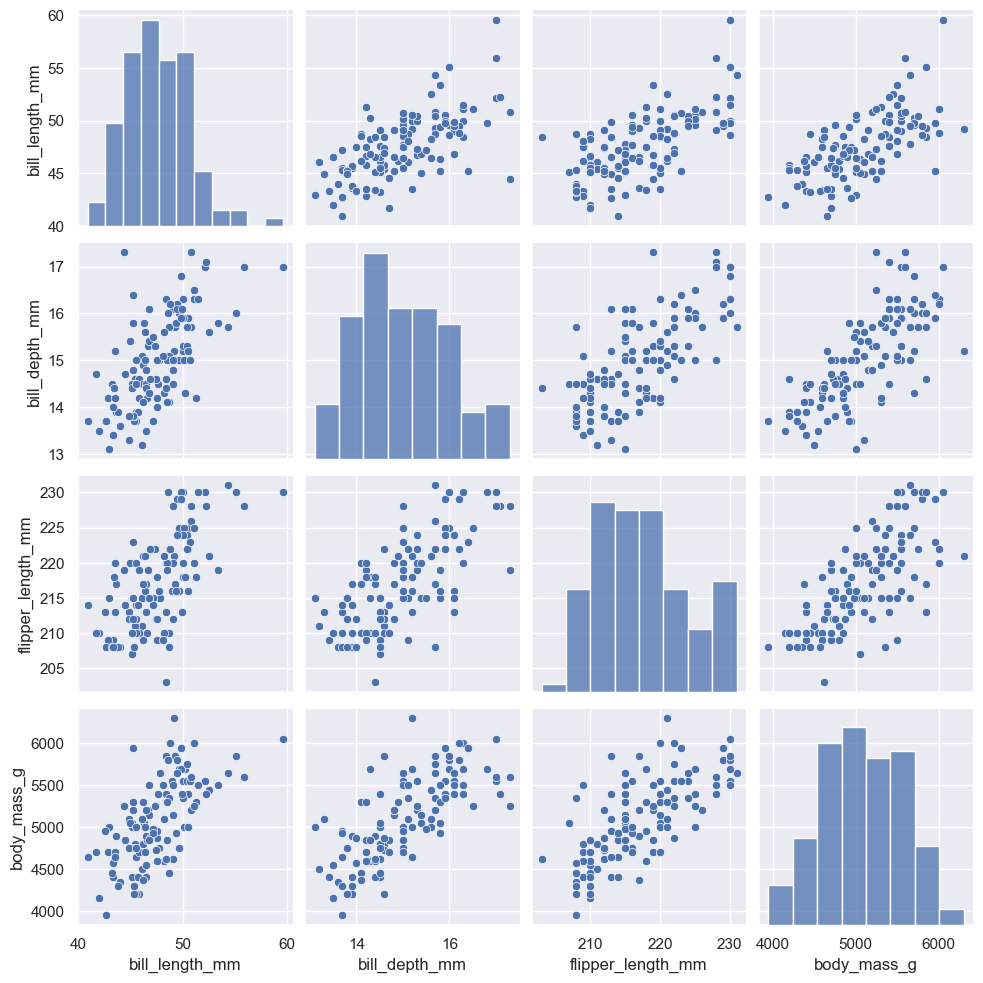

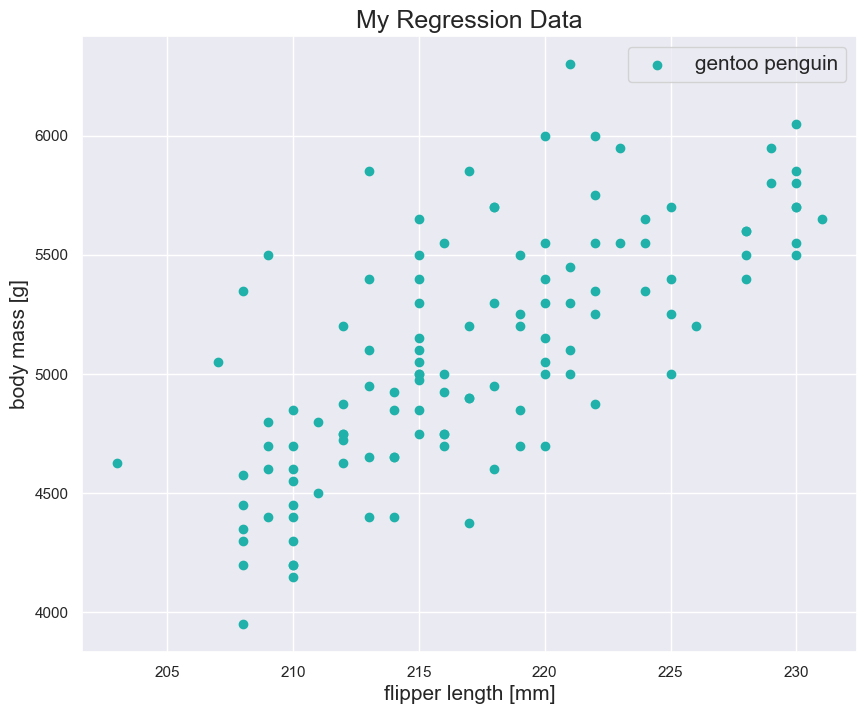

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("Datasets/palmer_penguins.csv")
df = df.dropna() # remove the NA rows
df.drop(df.columns[0], axis=1, inplace=True)
df = df.reset_index(drop=True)
idx = df.index[df.species == "Gentoo"]

plt.figure(figsize=(6, 3))
img = sns.pairplot(df.iloc[idx])
plt.show(img)

df = df.iloc[idx][["flipper_length_mm", "body_mass_g"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.flipper_length_mm, 
            df.body_mass_g, 
            color = "lightseagreen",
            label = "gentoo penguin")
plt.xlabel("flipper length [mm]", fontsize = 15)
plt.ylabel("body mass [g]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()